# Análisis de componentes principales
**Nombre:** Juan Manuel Gutiérrez Gómez  **Código:** 2260563

Hasta ahora, hemos estado analizando en profundidad los estimadores de aprendizaje supervisado: aquellos estimadores que predicen etiquetas basándose en datos de entrenamiento etiquetados. Aquí comenzamos a observar varios estimadores no supervisados, que pueden resaltar aspectos interesantes de los datos sin hacer referencia a ninguna etiqueta conocida.

En esta sección, exploramos lo que quizás sea uno de los algoritmos no supervisados ​​más utilizados, el análisis de componentes principales (PCA). PCA es fundamentalmente un algoritmo de reducción de dimensionalidad, pero también puede ser útil como herramienta para visualización, filtrado de ruido, extracción de características e ingeniería, y mucho más. Después de una breve discusión conceptual del algoritmo PCA, veremos un par de ejemplos de estas aplicaciones adicionales.

Comenzamos con las importaciones estándar:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Introducción al Análisis de Componentes Principales

El análisis de componentes principales es un método no supervisado rápido y flexible para la reducción de la dimensionalidad de los datos, que vimos brevemente en Introducción a Scikit-Learn . Su comportamiento es más fácil de visualizar mirando un conjunto de datos bidimensional. Considere los siguientes 200 puntos:

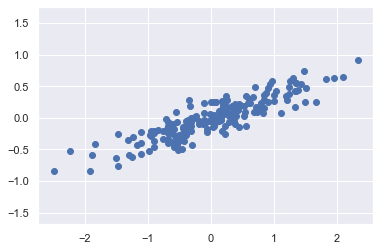

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

A simple vista, está claro que existe una relación casi lineal entre las variables x e y. Esto es una reminiscencia de los datos de regresión lineal que exploramos en **Regresión Lineal** pero la configuración del problema aquí es ligeramente diferente: en lugar de intentar predecir los valores de y a partir de los valores de x, el problema de aprendizaje no supervisado intenta aprender sobre la relación entre los valores de x e y.

En el análisis de componentes principales, esta relación se cuantifica encontrando una lista de los ejes principales en los datos y usando esos ejes para describir el conjunto de datos. Usando el estimador de Scikit-Learn PCA, podemos calcular esto de la siguiente manera:

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

El ajuste aprende algunas cantidades de los datos, sobre todo los "componentes" y la "varianza explicada":

In [4]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Para ver qué significan estos números, visualicémoslos como vectores sobre los datos de entrada, usando los "componentes" para definir la dirección del vector y la "varianza explicada" para definir la longitud al cuadrado del vector:

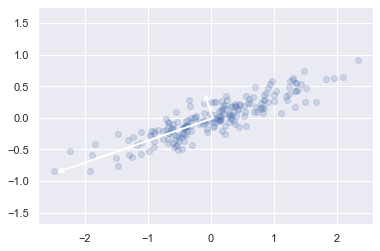

In [6]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Estos vectores representan los ejes principales de los datos, y la longitud del vector es una indicación de cuán "importante" es ese eje para describir la distribución de los datos; más precisamente, es una medida de la varianza de los datos cuando se proyectan sobre ese eje. La proyección de cada punto de datos sobre los ejes principales son los "componentes principales" de los datos.

## PCA como reducción de dimensionalidad

El uso de PCA para la reducción de la dimensionalidad implica poner a cero uno o más de los componentes principales más pequeños, lo que da como resultado una proyección de menor dimensión de los datos que conserva la variación máxima de los datos.

Aquí hay un ejemplo del uso de PCA como una transformación de reducción de dimensionalidad:

In [7]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Los datos transformados se han reducido a una sola dimensión. Para comprender el efecto de esta reducción de dimensionalidad, podemos realizar la transformada inversa de estos datos reducidos y representarlos junto con los datos originales:

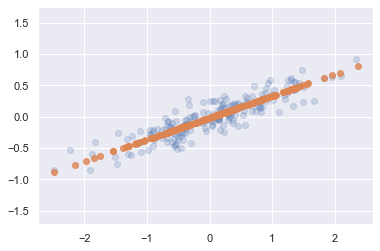

In [8]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Los puntos claros son los datos originales, mientras que los puntos oscuros son la versión proyectada. Esto aclara lo que significa una reducción de dimensionalidad de PCA: la información a lo largo del eje o ejes principales menos importantes se elimina, dejando solo los componentes de los datos con la varianza más alta. La fracción de varianza que se elimina (proporcional a la dispersión de puntos sobre la línea formada en esta figura) es aproximadamente una medida de cuánta "información" se descarta en esta reducción de dimensionalidad.

Este conjunto de datos de dimensión reducida es, en algunos sentidos, "lo suficientemente bueno" para codificar las relaciones más importantes entre los puntos: a pesar de reducir la dimensión de los datos en un 50 %, la relación general entre los puntos de datos se conserva en su mayor parte.

## PCA para visualización: dígitos escritos a mano

La utilidad de la reducción de la dimensionalidad puede no ser del todo evidente en solo dos dimensiones, pero se vuelve mucho más clara cuando se observan datos de alta dimensión. Para ver esto, echemos un vistazo rápido a la aplicación de PCA a los datos de dígitos que vimos en In-Depth: Decision Trees and Random Forests.

Empezamos cargando los datos:

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Recuerde que los datos consisten en imágenes de 8 × 8 píxeles, lo que significa que tienen 64 dimensiones. Para ganar algo de intuición en las relaciones entre estos puntos, podemos usar PCA para proyectarlos a un número más manejable de dimensiones, digamos dos:

In [10]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


Ahora podemos trazar los dos primeros componentes principales de cada punto para conocer los datos:

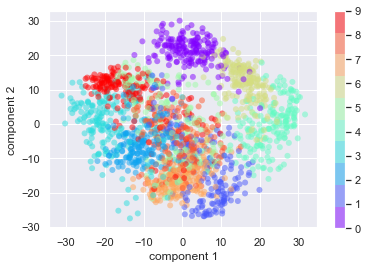

In [15]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.rcParams['axes.grid'] = False
plt.colorbar();

Recuerde lo que significan estos componentes: los datos completos son una nube de puntos de 64 dimensiones, y estos puntos son la proyección de cada punto de datos a lo largo de las direcciones con la mayor variación. Esencialmente, hemos encontrado el estiramiento y la rotación óptimos en un espacio de 64 dimensiones que nos permite ver el diseño de los dígitos en dos dimensiones, y lo hemos hecho sin supervisión, es decir, sin referencia a las etiquetas.

## Elegir el número de componentes

Una parte vital del uso de PCA en la práctica es la capacidad de estimar cuántos componentes se necesitan para describir los datos. Esto se puede determinar observando la *relación de varianza acumulada* explicada como una función del número de componentes:

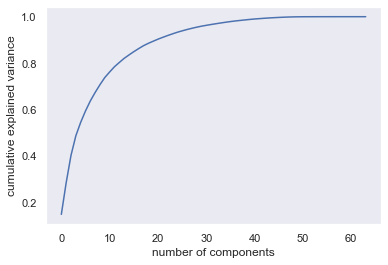

In [16]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Esta curva cuantifica cuánto de la varianza total de 64 dimensiones está contenido dentro de los primeros componentes $N$. Por ejemplo, vemos que con los dígitos los primeros 10 componentes contienen aproximadamente el 75% de la varianza, mientras que necesita alrededor de 50 componentes para describir cerca del 100% de la varianza.

Aquí vemos que nuestra proyección bidimensional pierde mucha información (medida por la varianza explicada) y que necesitaríamos alrededor de 20 componentes para retener el 90% de la varianza. Mirar este gráfico para un conjunto de datos de alta dimensión puede ayudarlo a comprender el nivel de redundancia presente en múltiples observaciones.

## PCA como filtrado de ruido

PCA también se puede utilizar como un enfoque de filtrado para datos ruidosos. La idea es esta: cualquier componente con una variación mucho mayor que el efecto del ruido no debería verse afectado por el ruido. Entonces, si reconstruye los datos utilizando solo el subconjunto más grande de componentes principales, debería mantener preferentemente la señal y descartar el ruido.

Veamos cómo se ve esto con los datos de los dígitos. Primero trazaremos varios de los datos de entrada libres de ruido:

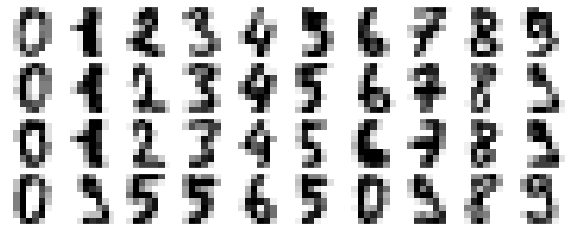

In [17]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Ahora agreguemos algo de ruido aleatorio para crear un conjunto de datos ruidoso y volver a trazarlo:

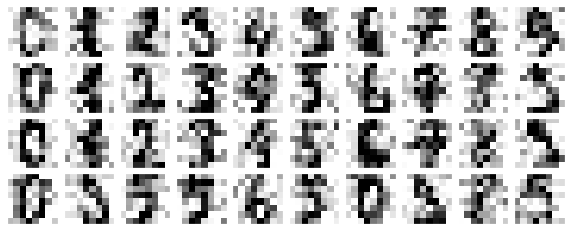

In [18]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

Está claro a simple vista que las imágenes tienen ruido y contienen píxeles falsos. Entrenemos un PCA en los datos ruidosos, solicitando que la proyección conserve el 50% de la varianza:

In [19]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Aquí el 50% de la varianza asciende a 12 componentes principales. Ahora calculamos estos componentes y luego usamos el inverso de la transformación para reconstruir los dígitos filtrados:

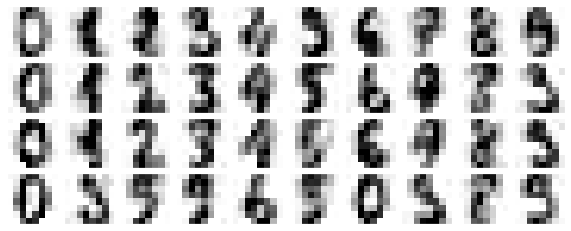

In [20]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Esta propiedad de filtrado de ruido/preservación de señal hace que PCA sea una rutina de selección de características muy útil; por ejemplo, en lugar de entrenar un clasificador en datos de dimensiones muy altas, puede entrenar al clasificador en la representación de dimensiones más bajas, que servirá automáticamente para filtrar eliminar el ruido aleatorio en las entradas.

## Ejemplo: caras propias

Anteriormente, exploramos un ejemplo del uso de una proyección PCA como selector de características para el reconocimiento facial con una máquina de vectores de soporte. Aquí vamos a echar un vistazo atrás y explorar un poco más de lo que pasó en eso. Recuerde que estábamos usando el conjunto de datos *__Labeled Faces in the Wild__* disponible a través de Scikit-Learn:

In [21]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Echemos un vistazo a los ejes principales que abarcan este conjunto de datos. Debido a que este es un conjunto de datos grande, usaremos **RandomizedPCA**: contiene un método aleatorio para aproximar los primeros componentes principales de $N$ mucho más rápido que el estimador **PCA** estándar y, por lo tanto, es muy útil para datos de alta dimensión (aquí, una dimensionalidad de casi 3.000). Echaremos un vistazo a los primeros 150 componentes:

In [23]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(n_components=150)

En este caso, puede ser interesante visualizar las imágenes asociadas con los primeros componentes principales (estos componentes se conocen técnicamente como "vectores propios", por lo que este tipo de imágenes a menudo se denominan "caras propias"). Como puede ver en esta figura, son tan espeluznantes como suenan:

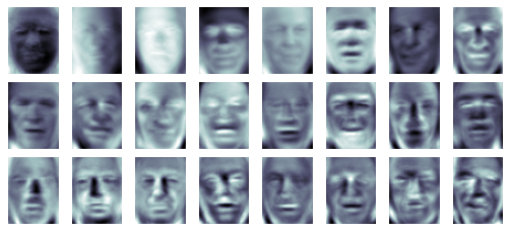

In [24]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Los resultados son muy interesantes y nos dan una idea de cómo varían las imágenes: por ejemplo, las primeras caras propias (desde la parte superior izquierda) parecen estar asociadas con el ángulo de iluminación en la cara, y los vectores principales posteriores parecen estar eligiendo ciertos rasgos, como ojos, narices y labios. Echemos un vistazo a la varianza acumulada de estos componentes para ver qué parte de la información de datos conserva la proyección:

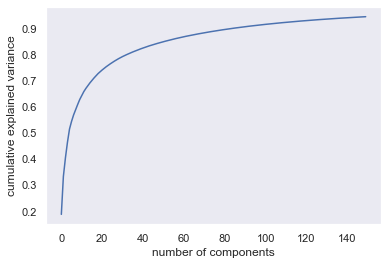

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Vemos que estos 150 componentes explican poco más del 90% de la varianza. Eso nos llevaría a creer que utilizando estos 150 componentes recuperaríamos la mayor parte de las características esenciales de los datos. Para hacer esto más concreto, podemos comparar las imágenes de entrada con las imágenes reconstruidas a partir de estos 150 componentes:

In [26]:
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

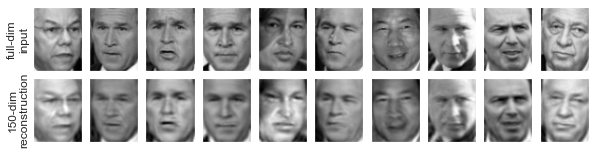

In [27]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

La fila superior aquí muestra las imágenes de entrada, mientras que la fila inferior muestra la reconstrucción de las imágenes de solo 150 de las ~3000 características iniciales. Esta visualización deja en claro por qué la selección de funciones de PCA utilizada en Support Vector Machines tuvo tanto éxito: aunque reduce la dimensionalidad de los datos en casi un factor de 20, las imágenes proyectadas contienen suficiente información que podríamos, a simple vista, reconocer a los individuos en la imagen. Lo que esto significa es que nuestro algoritmo de clasificación debe entrenarse con datos de 150 dimensiones en lugar de datos de 3000 dimensiones, lo que, según el algoritmo particular que elijamos, puede conducir a una clasificación mucho más eficiente.

**Conclusiones del Ejercicio**: El método PCA prueba ser efectivo para la reducción de la dimensionaliad en datasets imágenes, es interesante que el algoritmo pueda 'descomponer' tantas carácteristicas del rostro de una persona y aún asi conserve la mayor parte de las caráctesiticas principales a partir de la varianza que describen los componentes principales.

## Conclusión General

En conclusión, PCA o Análisis de Componentes Principales es una técnica de reducción de dimensionalidad de datos masivos. PCA Transforma un conjunto de variables correlacionadas en un nuevo conjunto de variables no correlacionadas. El objetivo de los análisis casi siempre va ser reducir la dimensionalidad en la cual se expresa el conjunto original de variables. 

Un ejemplo de aplicación de PCA es el de la biofarmaceútica, para el análisis de datos multivariantes en el monitoreo de e los bioprocesos, la detección de fallas y la optimización ya que los datos de estos estuidos son muy heterogéneos, correlacionados y no lineales por naturaleza, en este sentido la utilidad de las técnicas de análisis de datos multivariantes ha sido probada en el área de la industria biofarmacéutica. 